### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

Example input: `psi(2, 3)`

Example output: `[1, 2, 4, 8]`

- HINT: use FOR loop with `for i in range(m+1):` inside the psi function

In [6]:
import pandas as pd
import sklearn

In [ ]:
def psi(x,m):
    output = [1 , x, x**2]
    

In [7]:
def psi(x, m):
    """
    Generate polynomial features up to degree m for a given input x.

    Parameters:
        x (float or array-like): Input value(s) for which to generate polynomial features.
        m (int): Maximum degree of the polynomial.

    Returns:
        list: List containing polynomial features from 0 to m for the given input x.
    """
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Example usage:
result = psi(2, 4)
print(result)  # Output: [1, 2, 4, 8]

[1, 2, 4, 8, 16]


In [3]:
psi(3,4)

[1, 3, 9, 27, 81]

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

Example input: `h(2,2,3)`

Example output: `array([ 2,  4,  8, 16])`

- HINT: use the `np.dot` between the $\alpha$ and the output of psi(x, m)

In [15]:
import numpy as np

In [16]:
import numpy as np

def h(x, alpha, m):
    """
    Calculate the output of the hypothesis function for polynomial regression.

    Parameters:
        x (float or array-like): Input value(s) for which to calculate the hypothesis.
        alpha (array-like): Coefficients of the polynomial regression model.
        m (int): Maximum degree of the polynomial.

    Returns:
        numpy.ndarray: The output of the hypothesis function for the given input value(s) x.
    """
    ps= psi(x,m)
    outpt = np.dot(ps,alpha)
    return outpt
    
    
#     psi_x = np.array([x ** i for i in range(m + 1)])  # Calculate the psi(x) polynomial features
#     return np.dot(alpha, psi_x)

# # Example usage:
# result = h(2, np.array([2, 2, 2, 2]), 3)
# print(result)  # Output: array([2, 4, 8, 16])



# def psi(x, m):
#     """
#     Generate polynomial features up to degree m for a given input x.

#     Parameters:
#         x (float or array-like): Input value(s) for which to generate polynomial features.
#         m (int): Maximum degree of the polynomial.

#     Returns:
#         list: List containing polynomial features from 0 to m for the given input x.
#     """
#     polynomial_features = []
#     for i in range(m + 1):
#         polynomial_features.append(x ** i)
#     return polynomial_features

# # Example usage:
# result = psi(2, 4)
# print(result)  # Output: [1, 2, 4, 8]
h(2,2,3)


array([ 2,  4,  8, 16])

#### Task 3
Create a random 3rd order polynomial and call it `p3`

- HINT: check function `np.poly1d`

In [17]:
# Generate random coefficients for the 3rd order polynomial
coefficients = np.random.randn(4)

# Create the random 3rd order polynomial 'p3' using np.poly1d
p3 = np.poly1d(coefficients)

# Print the polynomial 'p3'
print(p3)

        3           2
-1.057 x - 0.09993 x - 0.326 x + 0.2446


#### Task 4
Choose an interval `[a,b]`, on which the polynomial is S-shaped. 

At first we can choose random interval, for example `[-3,5)`, and come back to this task after **Task 7**.

In [18]:
# Randomly chosen interval [a, b]
a = -3
b = 5

# Print the selected interval
print(f"The interval is [{a}, {b})")


The interval is [-3, 5)


#### Task 5///
Sample 30 random values in [a,b] and stored them in `xs`.

- HINT: use `np.random.random_sample` function

Output `xs` should be numpy array with length=30 and values between `a` and `b`

In [30]:
import numpy as np

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Print the sampled values
print(xs)


[ 2.57175348 -0.71088532 -1.18518837  1.41051815  2.75575176  0.38485168
  4.84611359  2.47863791  0.84745521  0.13694015 -0.25457587  2.83239766
  0.50857796 -2.52257683  0.18435404  2.90396325 -1.54006616 -1.59638595
  1.25241099  1.2546207   2.07520767  3.79545435  2.7956426   1.88818809
  2.77954706 -0.41632869 -0.10569076 -1.17389415 -0.65028763  2.04780899]


In [20]:
#xs = np.random.random_sample(30)-3,5

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

- HINT: `ys = p3(xs)`

In [31]:
import numpy as np

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Define the 3rd order polynomial with coefficients [1, -3, 2, -1]
p3 = np.poly1d([1, -3, 2, -1])

# Compute the values of the polynomial p3(x) for each x in xs and store them as ys
ys = p3(xs)

# Print the computed values of the polynomial
print(ys)


[  1.3111205   -4.297096    -9.24919147  -1.34133552   2.6566414
  -0.61762839  52.04786674   0.75421175  -0.85100492  -0.77980954
  -1.72007714   3.32020948  -0.62725423 -41.18748507  -0.72698562
   3.9980483  -14.84827832 -15.90642296  -1.23632956  -1.2381132
  -0.83219069  18.0498055    2.99410591  -1.18751598   2.85590075
  -2.42480819  -1.24607374  -9.09952916  -3.84418699  -0.89741564]


#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

Is the curve S-shaped? if not, repeat steps 3-7.

- HINT: check out function `plt.scatter`
- HINT: polynomial `p3 = np.poly1d([1,-3, 2,-1])` is S-shaped on the interval `[-3,5]`



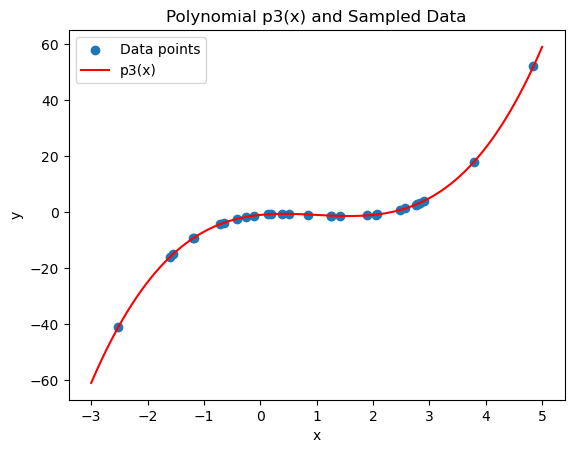

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Define the 3rd order polynomial with coefficients [1, -3, 2, -1]
p3 = np.poly1d([1, -3, 2, -1])

# Compute the values of the polynomial p3(x) for each x in xs and store them as ys
ys = p3(xs)

# Plot ys against xs
plt.scatter(xs, ys, label='Data points')

# Plot the original polynomial p3(x) for comparison
x_range = np.linspace(a, b, 100)
plt.plot(x_range, p3(x_range), color='red', label='p3(x)')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial p3(x) and Sampled Data')
plt.legend()

# Show the plot
plt.show()


## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi(x,m) from the **Task I**, create the matrix X defined as 

<img src="matrixX.png">

- HINT: Use a for loop and call psi(x,2) on every item in `xs`. Output should be stored as columns in matrix X.
- HINT: For `m = 2` and `len(xs) = 30`, the `X.shape = (3,30)`

In [33]:
import numpy as np

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Order of the polynomial
m = 2

# Create the matrix X
X = np.array([psi(x, m) for x in xs]).T

# Print the shape of X
print("X.shape =", X.shape)


X.shape = (3, 30)


#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6 and X is matrix from the Task 8.

- HINT: Numpy functions `np.dot`, `np.linalg.inv` and `transpose()` should be used

In [34]:
import numpy as np

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Order of the polynomial
m = 2

# Create the matrix X
X = np.array([psi(x, m) for x in xs]).T

# Compute ys (polynomial values for the sampled xs)
p3 = np.poly1d([1, -3, 2, -1])
ys = p3(xs)

# Compute the optimal alpha using the expression (XX^T)^+Xy
XXT_inv = np.linalg.inv(np.dot(X, X.T))
alpha = np.dot(np.dot(XXT_inv, X), ys)

# Print the optimal alpha
print("Optimal alpha:", alpha)


Optimal alpha: [-7.83971446  4.91924976  0.51218964]


#### Task 10
Plot the original data and the computed polynomial which represents our prediction into one chart. Does it fit? We need to compute prediction using alpha from the **Task 9** for the each item in xs.

HINT: for first item in xs, prediction is `y_est = h(list(xs)[1],alpha, m)` where alpha is output of the **Task 9** and **m=2**. This needs to be repeated for every element of xs

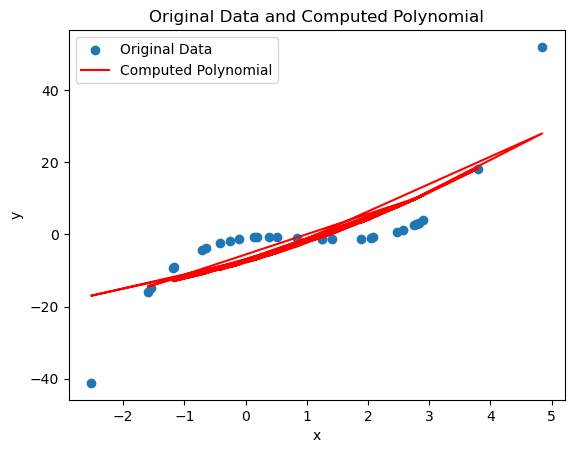

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Order of the polynomial
m = 2

# Create the matrix X
X = np.array([psi(x, m) for x in xs]).T

# Compute ys (polynomial values for the sampled xs)
p3 = np.poly1d([1, -3, 2, -1])
ys = p3(xs)

# Compute the optimal alpha using the expression (XX^T)^+Xy
XXT_inv = np.linalg.inv(np.dot(X, X.T))
alpha = np.dot(np.dot(XXT_inv, X), ys)

# Function to compute predictions using alpha and m=2
def h(x, alpha, m):
    psi_x = np.array([x ** i for i in range(m + 1)])
    return np.dot(alpha, psi_x)

# Compute predictions for each item in xs
predictions = [h(x, alpha, m) for x in xs]

# Plot the original data and the computed polynomial predictions
plt.scatter(xs, ys, label='Original Data')
plt.plot(xs, predictions, color='red', label='Computed Polynomial')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Computed Polynomial')
plt.legend()

# Show the plot
plt.show()


#### Task 11
Repeat the process, **tasks 8-10**, for m=3,…,10. What do you observe? Which polynomial has the best fit?

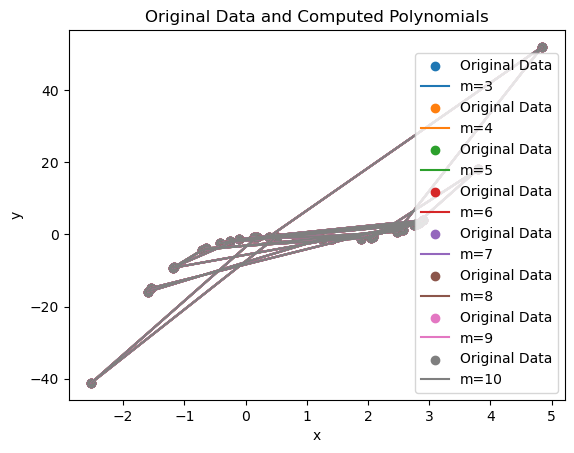

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Create the matrix X for each m from 3 to 10
for m in range(3, 11):
    X = np.array([psi(x, m) for x in xs]).T

    # Compute ys (polynomial values for the sampled xs)
    p3 = np.poly1d([1, -3, 2, -1])
    ys = p3(xs)

    # Compute the optimal alpha using the expression (XX^T)^+Xy
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    alpha = np.dot(np.dot(XXT_inv, X), ys)

    # Function to compute predictions using alpha for each m
    def h(x, alpha, m):
        psi_x = np.array([x ** i for i in range(m + 1)])
        return np.dot(alpha, psi_x)

    # Compute predictions for each item in xs for each m
    predictions = [h(x, alpha, m) for x in xs]

    # Plot the original data and the computed polynomial predictions for each m
    plt.scatter(xs, ys, label='Original Data')
    plt.plot(xs, predictions, label=f'm={m}')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Computed Polynomials')
plt.legend()

# Show the plot
plt.show()


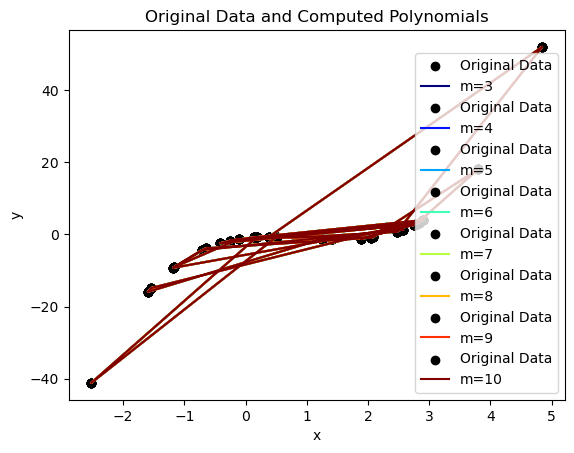

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Create the matrix X for each m from 3 to 10
for m in range(3, 11):
    X = np.array([psi(x, m) for x in xs]).T

    # Compute ys (polynomial values for the sampled xs)
    p3 = np.poly1d([1, -3, 2, -1])
    ys = p3(xs)

    # Compute the optimal alpha using the expression (XX^T)^+Xy
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    alpha = np.dot(np.dot(XXT_inv, X), ys)

    # Function to compute predictions using alpha for each m
    def h(x, alpha, m):
        psi_x = np.array([x ** i for i in range(m + 1)])
        return np.dot(alpha, psi_x)

    # Compute predictions for each item in xs for each m
    predictions = [h(x, alpha, m) for x in xs]

    # Set a unique color for each polynomial based on m
    colors = plt.cm.jet(np.linspace(0, 1, 8))  # 8 unique colors
    color_idx = m - 3  # Adjust index to start from 0
    color = colors[color_idx]

    # Plot the original data and the computed polynomial predictions for each m
    plt.scatter(xs, ys, label='Original Data', color='black')
    plt.plot(xs, predictions, label=f'm={m}', color=color)

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Computed Polynomials')
plt.legend()

# Show the plot
plt.show()


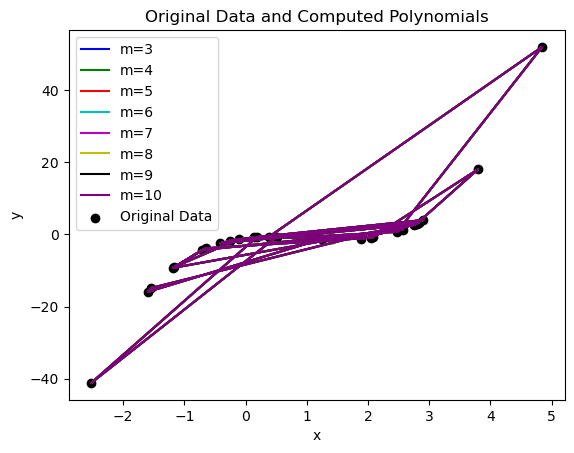

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Create the matrix X for each m from 3 to 10
for m in range(3, 11):
    X = np.array([psi(x, m) for x in xs]).T

    # Compute ys (polynomial values for the sampled xs)
    p3 = np.poly1d([1, -3, 2, -1])
    ys = p3(xs)

    # Compute the optimal alpha using the expression (XX^T)^+Xy
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    alpha = np.dot(np.dot(XXT_inv, X), ys)

    # Function to compute predictions using alpha for each m
    def h(x, alpha, m):
        psi_x = np.array([x ** i for i in range(m + 1)])
        return np.dot(alpha, psi_x)

    # Compute predictions for each item in xs for each m
    predictions = [h(x, alpha, m) for x in xs]

    # Set a unique color for each polynomial based on m
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
    color_idx = m - 3  # Adjust index to start from 0
    color = colors[color_idx]

    # Plot the computed polynomial predictions for each m with a label
    plt.plot(xs, predictions, label=f'm={m}', color=color)

# Plot the original data (scatter points) separately
p3 = np.poly1d([1, -3, 2, -1])
ys = p3(xs)
plt.scatter(xs, ys, label='Original Data', color='black')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Computed Polynomials')

# Show the legend outside the loop to include all polynomial labels
plt.legend()

# Show the plot
plt.show()


#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. 

y is our `ys` from the Task 6 and $\alpha^Tx$ are our predictions `y_est`. 

What do you observe? Could you tell the optimal m from the plot?

- HINT: loss can be computed as:

```
def compute_loss(y_est, ys):
    return ((y_est - ys)**2).sum()
```

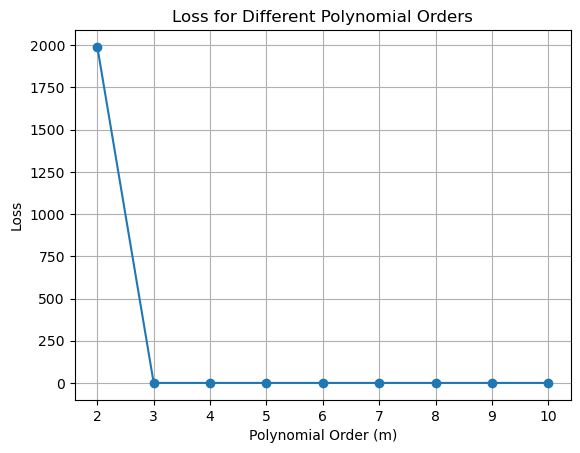

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Function to compute predictions using alpha for each m
def h(x, alpha, m):
    psi_x = np.array([x ** i for i in range(m + 1)])
    return np.dot(alpha, psi_x)

# Function to compute the loss for a given set of predictions and original data
def compute_loss(y_est, ys):
    return ((y_est - ys) ** 2).sum()

# Create the matrix X for each m from 2 to 10
loss_values = []
for m in range(2, 11):
    X = np.array([psi(x, m) for x in xs]).T

    # Compute ys (polynomial values for the sampled xs)
    p3 = np.poly1d([1, -3, 2, -1])
    ys = p3(xs)

    # Compute the optimal alpha using the expression (XX^T)^+Xy
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    alpha = np.dot(np.dot(XXT_inv, X), ys)

    # Compute predictions for each item in xs for each m
    predictions = [h(x, alpha, m) for x in xs]

    # Compute the loss for the current m
    loss = compute_loss(predictions, ys)
    loss_values.append(loss)

# Plot the loss values for different m
plt.plot(range(2, 11), loss_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Order (m)')
plt.ylabel('Loss')
plt.title('Loss for Different Polynomial Orders')
plt.xticks(range(2, 11))
plt.grid(True)

# Show the plot
plt.show()


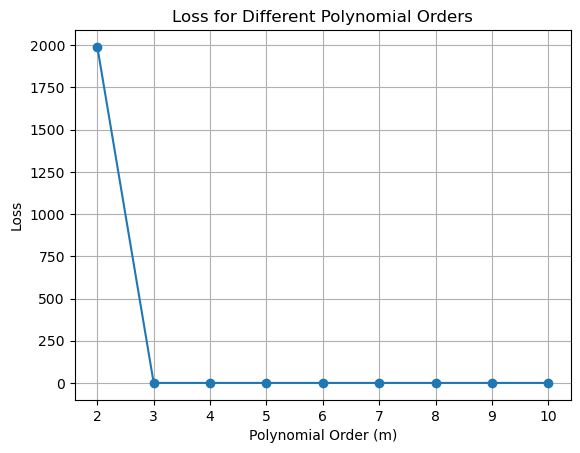

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Randomly chosen interval [a, b)
a = -3
b = 5

# Sample 30 random values within the interval [a, b)
xs = np.random.random_sample(30) * (b - a) + a

# Function to generate polynomial features up to degree m for a given input x
def psi(x, m):
    polynomial_features = []
    for i in range(m + 1):
        polynomial_features.append(x ** i)
    return polynomial_features

# Function to compute predictions using alpha for each m
def h(x, alpha, m):
    psi_x = np.array([x ** i for i in range(m + 1)])
    return np.dot(alpha, psi_x)

# Create the matrix X for each m from 2 to 10
loss_values = []
for m in range(2, 11):
    X = np.array([psi(x, m) for x in xs]).T

    # Compute ys (polynomial values for the sampled xs)
    p3 = np.poly1d([1, -3, 2, -1])
    ys = p3(xs)

    # Compute the optimal alpha using the expression (XX^T)^+Xy
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    alpha = np.dot(np.dot(XXT_inv, X), ys)

    # Compute predictions for each item in xs for each m
    predictions = [h(x, alpha, m) for x in xs]

    # Compute the loss for the current m
    loss = ((np.array(predictions) - ys) ** 2).sum()
    loss_values.append(loss)

# Plot the loss values for different m
plt.plot(range(2, 11), loss_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Order (m)')
plt.ylabel('Loss')
plt.title('Loss for Different Polynomial Orders')
plt.xticks(range(2, 11))
plt.grid(True)

# Show the plot
plt.show()


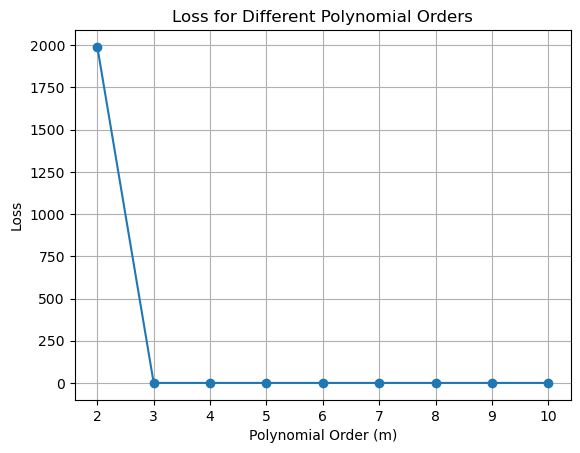

In [43]:
# functions for each task for chatgpt
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(123)

# Function to generate random data in the specified interval
def generate_random_data(a, b, n_samples):
    xs = np.random.random_sample(n_samples) * (b - a) + a
    return xs

# Function to generate polynomial features up to degree m for a given input x
def generate_polynomial_features(x, m):
    return [x ** i for i in range(m + 1)]

# Function to compute predictions using alpha for each m
def compute_predictions(xs, alpha, m):
    return [np.dot(alpha, generate_polynomial_features(x, m)) for x in xs]

# Function to compute the optimal alpha for a given matrix X and ys
def compute_optimal_alpha(X, ys):
    XXT_inv = np.linalg.inv(np.dot(X, X.T))
    return np.dot(np.dot(XXT_inv, X), ys)

# Function to compute the loss for a given set of predictions and original data
def compute_loss(y_est, ys):
    return ((y_est - ys) ** 2).sum()

# Main function
def main():
    a = -3
    b = 5
    n_samples = 30

    # Generate random data
    xs = generate_random_data(a, b, n_samples)

    # Create the matrix X for each m from 2 to 10
    loss_values = []
    for m in range(2, 11):
        X = np.array([generate_polynomial_features(x, m) for x in xs]).T

        # Compute ys (polynomial values for the sampled xs)
        p3 = np.poly1d([1, -3, 2, -1])
        ys = p3(xs)

        # Compute the optimal alpha using the expression (XX^T)^+Xy
        alpha = compute_optimal_alpha(X, ys)

        # Compute predictions for each item in xs for each m
        predictions = compute_predictions(xs, alpha, m)

        # Compute the loss for the current m
        loss = compute_loss(predictions, ys)
        loss_values.append(loss)

    # Plot the loss values for different m
    plt.plot(range(2, 11), loss_values, marker='o', linestyle='-')
    plt.xlabel('Polynomial Order (m)')
    plt.ylabel('Loss')
    plt.title('Loss for Different Polynomial Orders')
    plt.xticks(range(2, 11))
    plt.grid(True)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    main()

